In [13]:
import numpy as np
import pandas as pd

# EDA

In [22]:
data_path = 'C:\DS_study\study\ch6_bike_demand_prediction/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [23]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [24]:
train.shape

(10886, 12)

In [25]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [26]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [28]:
print(train['datetime'][100])

2011-01-05 09:00:00


In [29]:
train['year'] = train['datetime'].apply(lambda x:x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x:x.split()[0].split('-')[1])
train['day']= train['datetime'].apply(lambda x:x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[2])

train['date'] = train['datetime'].apply(lambda x:x.split()[0])

In [30]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00,00,00,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01,00,00,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02,00,00,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01,03,00,00,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01,04,00,00,2011-01-01


In [31]:
from datetime import datetime
import calendar

print(train['date'][100])
print(datetime.strptime(train['date'][100],'%Y-%m-%d'))
print(datetime.strptime(train['date'][100],'%Y-%m-%d').weekday())
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])
print(calendar.day_name[datetime.strptime('2023-03-09', '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday
Thursday


In [32]:
a = pd.read_csv(data_path + 'test.csv', parse_dates=['datetime'])

In [33]:
a['year'] = a['datetime'].dt.year

In [34]:
a.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011


In [35]:
train['weekday'] = train['date'].apply(
    lambda dateString: 
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [36]:
train['season'] = train['season'].map({1: 'Spring', 
                                       2: 'Summer', 
                                       3: 'Fall', 
                                       4: 'Winter' })
train['weather'] = train['weather'].map({1: 'Clear', 
                                         2: 'Mist, Few clouds', 
                                         3: 'Light Snow, Rain, Thunder', 
                                         4: 'Heavy Snow, Rain, Thunder'})

In [37]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,date,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011,01,01,00,00,00,2011-01-01,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011,01,01,01,00,00,2011-01-01,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011,01,01,02,00,00,2011-01-01,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011,01,01,03,00,00,2011-01-01,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011,01,01,04,00,00,2011-01-01,Saturday


In [38]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

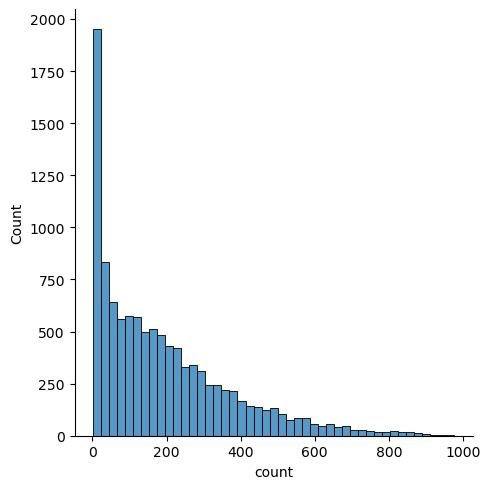

In [39]:
sns.displot(train['count'])

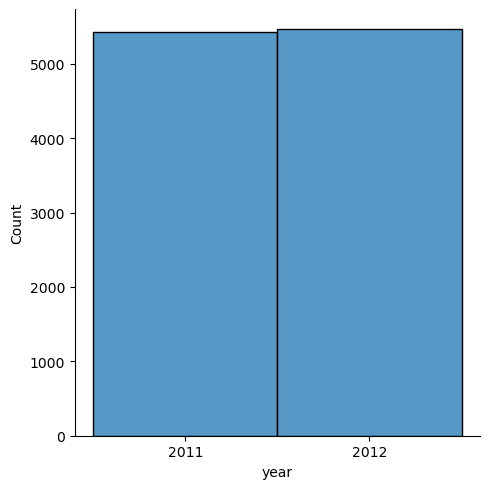

In [40]:
sns.displot(train['year'])

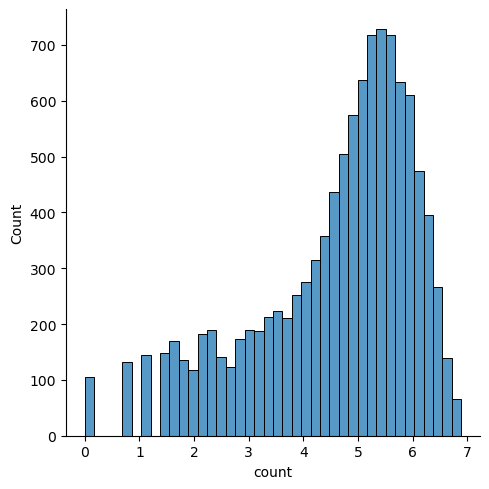

In [41]:
sns.displot(np.log(train['count']))

In [42]:
print(np.log(train['count']))

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
10881    5.817111
10882    5.484797
10883    5.123964
10884    4.859812
10885    4.477337
Name: count, Length: 10886, dtype: float64


In [43]:
train['count'][0]

16

In [44]:
np.log(16)

2.772588722239781

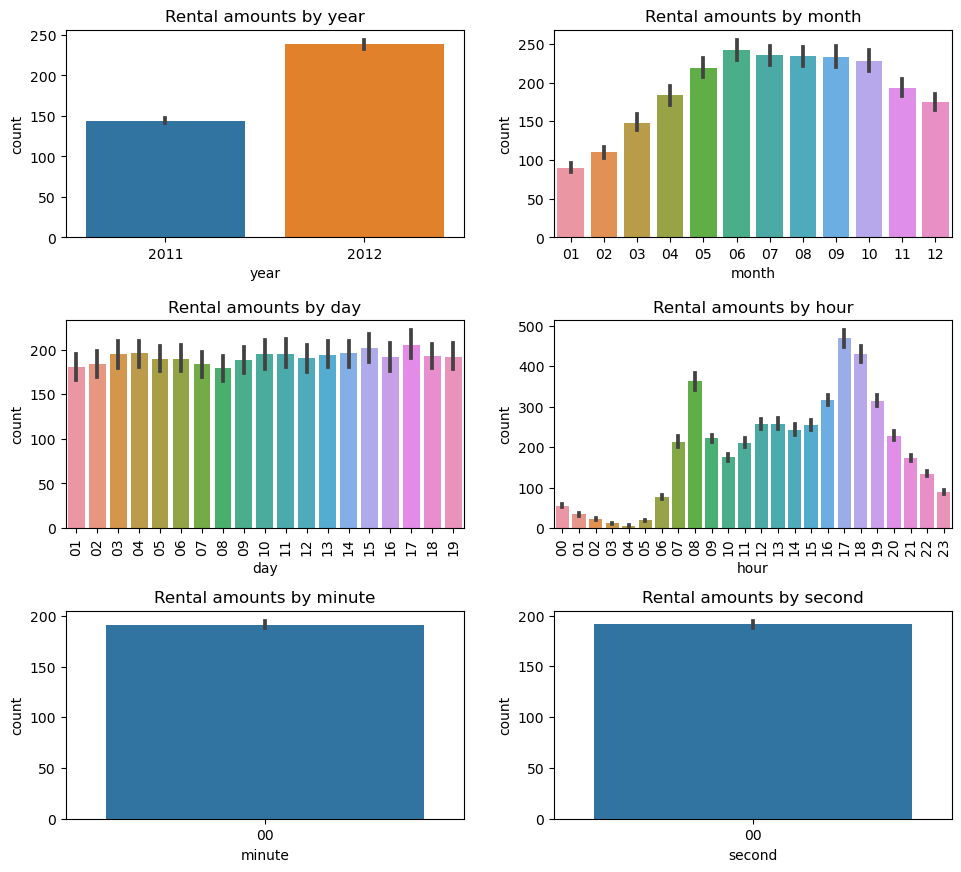

In [45]:
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 9)

sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

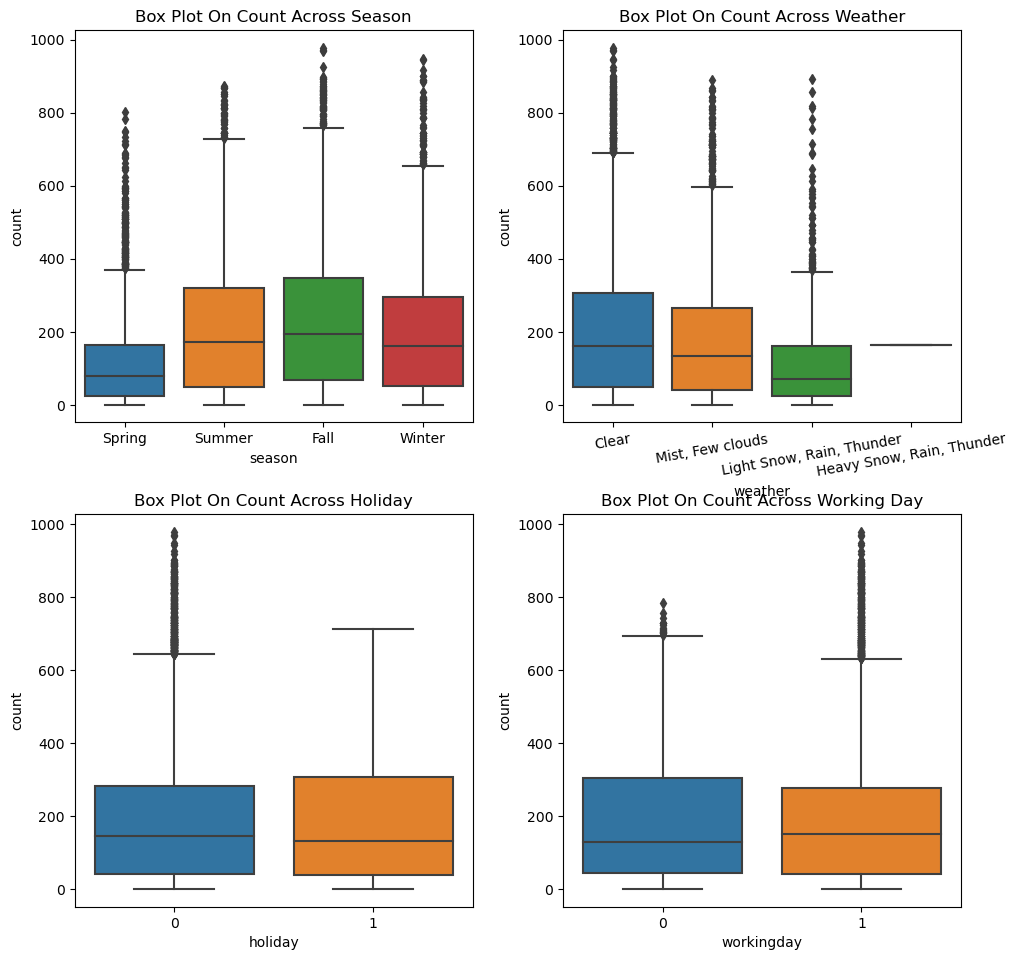

In [46]:
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

axes[0, 1].tick_params('x', labelrotation=10)

<AxesSubplot: xlabel='hour', ylabel='count'>

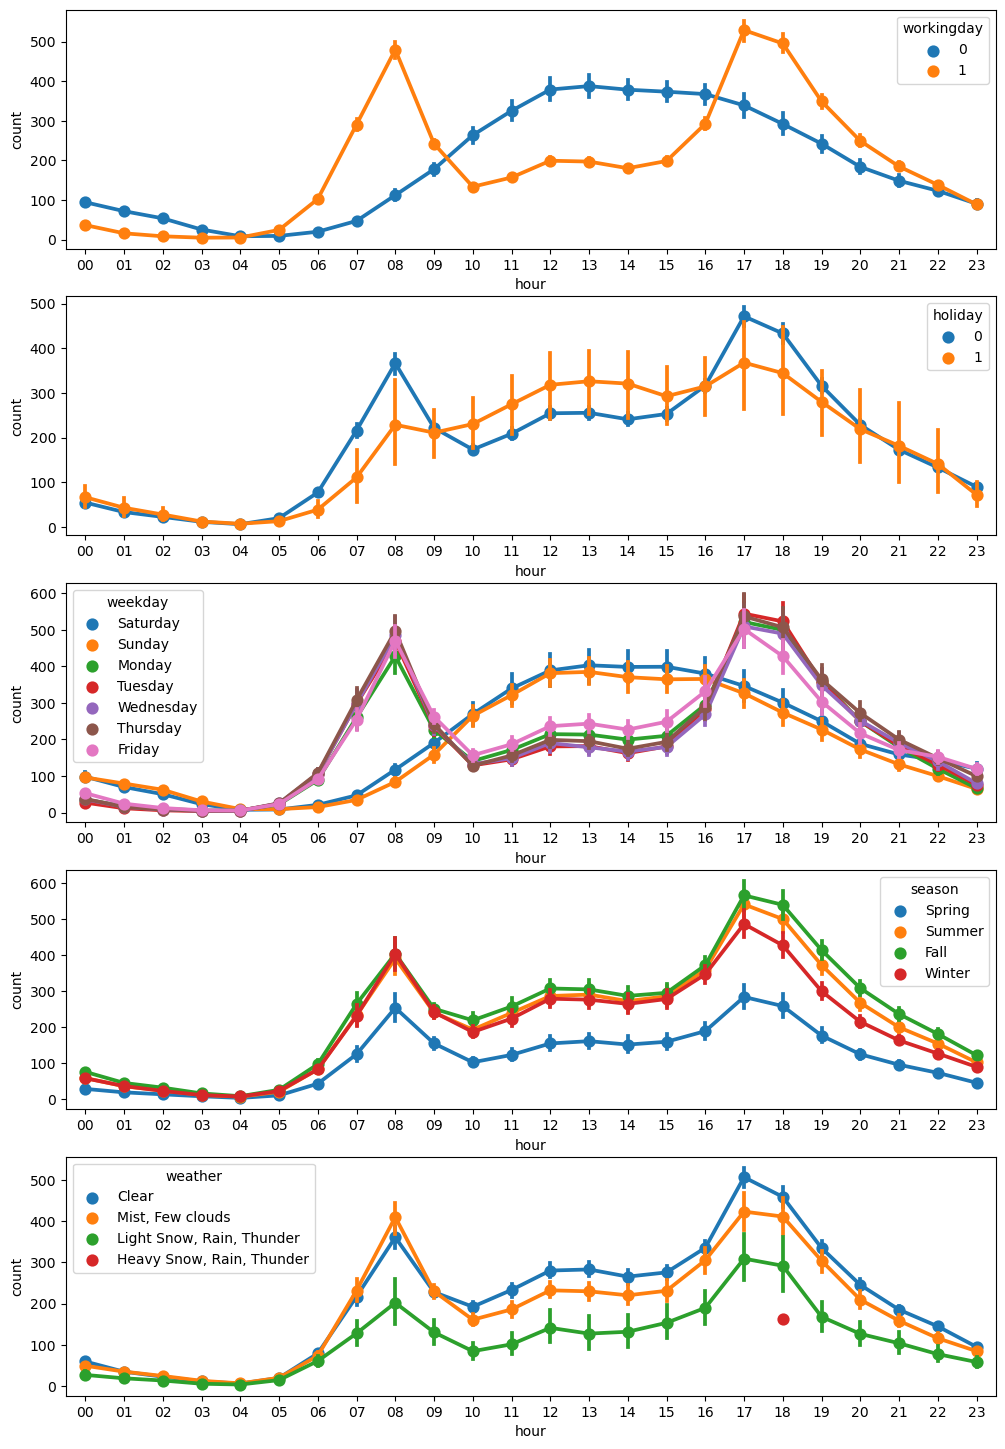

In [47]:
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])

<AxesSubplot: xlabel='humidity', ylabel='count'>

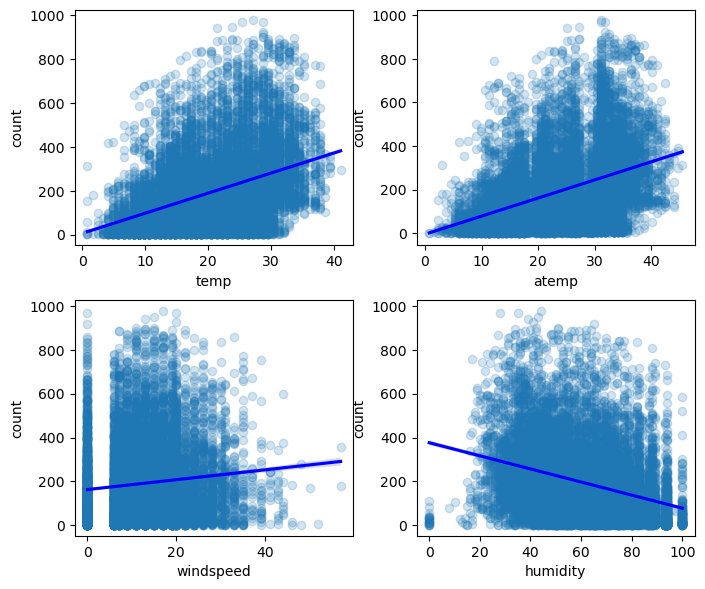

In [48]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7, 6)

sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})

In [49]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


In [50]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,date,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,2011,01,01,00,00,00,2011-01-01,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,2011,01,01,01,00,00,2011-01-01,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,2011,01,01,02,00,00,2011-01-01,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,2011,01,01,03,00,00,2011-01-01,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,2011,01,01,04,00,00,2011-01-01,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,00,00,2012-12-19,Wednesday
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,00,00,2012-12-19,Wednesday
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,00,00,2012-12-19,Wednesday
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,00,00,2012-12-19,Wednesday


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

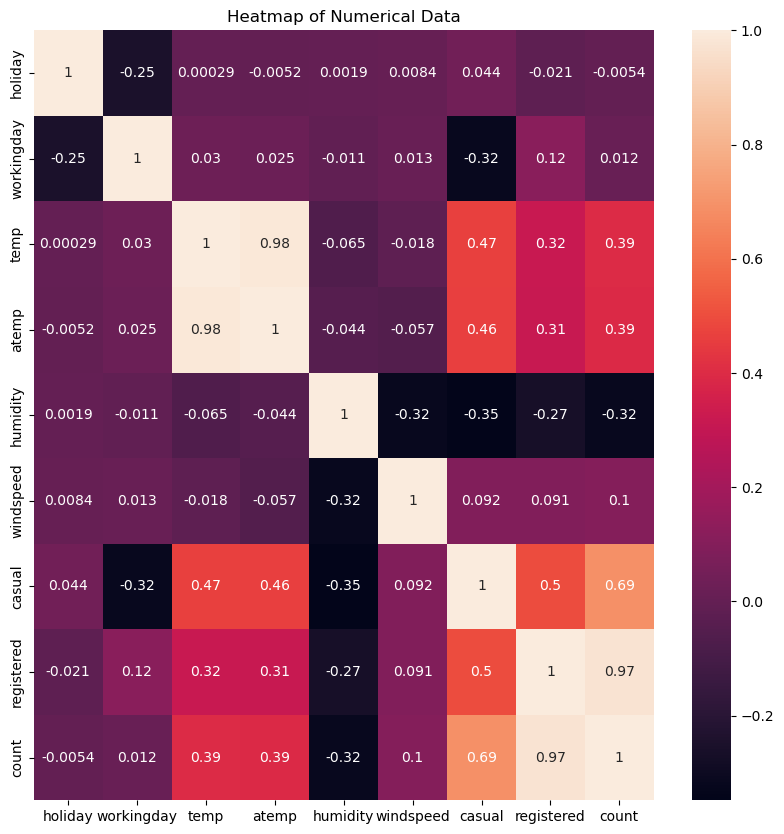

In [51]:
# corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
corrMat = train[:].corr()
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True)
ax.set(title='Heatmap of Numerical Data')

# Model

In [52]:
dataTrain = pd.read_csv(data_path + 'train.csv')
dataTest = pd.read_csv(data_path + 'test.csv')

In [53]:
data = dataTrain.append(dataTest)
# data.reset_index(inplace=True)
# data.drop('index',inplace=True,axis=1)
data.head()


C:\Users\teo75\AppData\Local\Temp\ipykernel_13624\366176513.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataTrain.append(dataTest)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [54]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [55]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

C:\Users\teo75\AppData\Local\Temp\ipykernel_13624\788297929.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWind0["windspeed"] = wind0Values
C:\Users\teo75\AppData\Local\Temp\ipykernel_13624\788297929.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataWindNot0.append(dataWind0)


In [56]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [57]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [65]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"]
yLabels = dataTrain["count"]
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]

In [66]:
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

In [67]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [68]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

TypeError: can't multiply sequence by non-int of type 'float'

# 위 에러는 version 차이인듯...

# RandomForest


# RMSLE

In [69]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
rfModel.fit(dataTrain,yLabelsLog)
preds = rfModel.predict(X= dataTrain) #(X= dataTrain)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Random Forest:  0.10289076717741133


# RMSE 5 fold Crossvalidation

In [70]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(rfModel, dataTrain, yLabelsLog, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.48 -0.12 -0.21 -0.13 -0.14]
 5 folds 의 개별 RMSE scores :  [0.7  0.35 0.46 0.37 0.37]
 5 folds 의 평균 RMSE : 0.449 


# RMLSE vs RMSE
참고 : https://ahnjg.tistory.com/90
1. 아웃라이어가 있더라도 변동폭이 크지 않다.
2. 예측값과 실제값의 상대적인 error를 측정
3. 예측값이 실제값보다 작을 때(Under Estimation) 더 큰 패널티를 부여

# --------------------------------------------------------------

# 다른 방법 Random Forest

In [87]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [92]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)

RandomForestRegressor(n_jobs=-1, random_state=0)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [94]:
%time score = cross_val_score(model, dataTrain, yLabels, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
print("Score= {0:.5f}".format(score))

Wall time: 9.83 s
Score= 0.32496


In [95]:
model.fit(dataTrain,yLabels)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [96]:
predictions = model.predict(dataTest)

print(predictions.shape)
predictions[0:10]

(6493,)


array([ 10.68,   5.22,   3.44,   3.37,   2.98,   5.82,  36.14,  91.81,
       197.04, 118.4 ])

C:\Users\teo75\AppData\Local\Temp\ipykernel_13624\95980370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yLabels,ax=ax1,bins=50)
C:\Users\teo75\AppData\Local\Temp\ipykernel_13624\95980370.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions,ax=ax2,bins=50)


[Text(0.5, 1.0, 'test')]

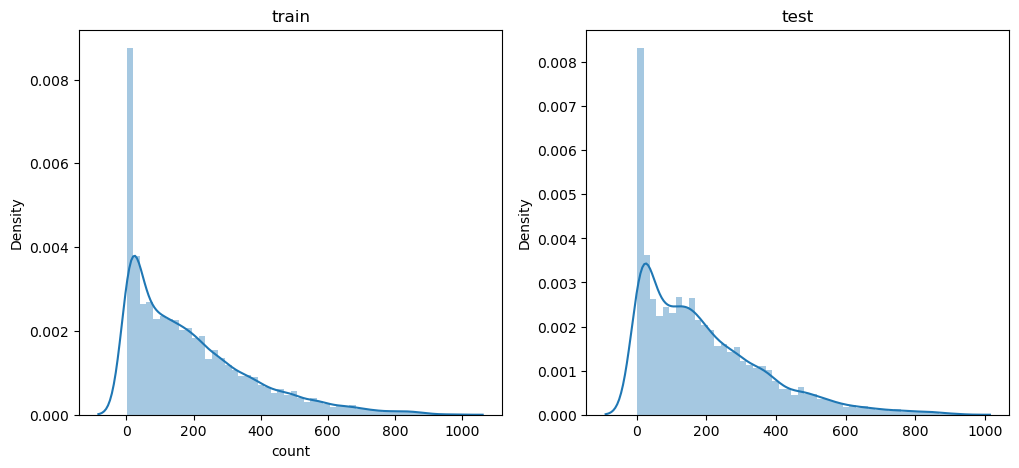

In [97]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(yLabels,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

In [98]:
submission = pd.DataFrame({
        "datetime": test["datetime"],
        "count" : predictions
    })

In [99]:
submission.to_csv('C:\DS_study\study\ch6_bike_demand_prediction/score_bike_sharing.csv', index=False)

In [100]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,10.68
1,2011-01-20 01:00:00,5.22
2,2011-01-20 02:00:00,3.44
3,2011-01-20 03:00:00,3.37
4,2011-01-20 04:00:00,2.98
